In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
getwd()
setwd("/content/drive/MyDrive/10mo semestre/ML R")
getwd()

[1] "/content"

[1] "/content/drive/MyDrive/10mo semestre/ML R"

# **Ejercicio 1**

In [ ]:
# Cargar datos
coronaria <- read.csv("coronaria.csv")
colnames(coronaria) <- c("edad", "CHD")
head(coronaria)
summary(coronaria)

,edad,CHD
,<int>,<int>
1,20,0
2,23,0
3,24,0
4,25,0
5,25,1
6,26,0


      edad            CHD      
 Min.   :20.00   Min.   :0.00  
 1st Qu.:34.75   1st Qu.:0.00  
 Median :44.00   Median :0.00  
 Mean   :44.38   Mean   :0.43  
 3rd Qu.:55.00   3rd Qu.:1.00  
 Max.   :69.00   Max.   :1.00  

**a)** Valor esperado de las betas asociadas por medio de IRLWLS

In [ ]:
# Ajustando el modelo utilizando la función glm
modelo1 <- glm(CHD ~ edad, data = coronaria, family = binomial(link = "logit"))
summary(modelo1)


Call:
glm(formula = CHD ~ edad, family = binomial(link = "logit"), 
    data = coronaria)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.30945    1.13365  -4.683 2.82e-06 ***
edad         0.11092    0.02406   4.610 4.02e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.66  on 99  degrees of freedom
Residual deviance: 107.35  on 98  degrees of freedom
AIC: 111.35

Number of Fisher Scoring iterations: 4


In [ ]:
beta <- c(-10, 0.2)
X <- model.matrix(modelo1)
y <- coronaria$CHD

W <- diag(1, nrow = nrow(X))
tolerancia <- 1e-6
max_iter <- 100
dif_beta <- 10
iter <- 0

while((dif_beta > tolerancia) & (iter < max_iter)) {
  iter <- iter + 1

  mu <- as.vector(X %*% beta)
  p <- 1 / (1 + exp(-mu))

  # Calcular la matriz diagonal de pesos W
  W <- diag(p * (1 - p))

  # Actualizar los coeficientes beta
  sgm <- solve(t(X) %*% W %*% X)
  delta <- as.vector(sgm %*% t(X) %*% (y - p))
  beta_new <- beta + delta

  # Calcular el residuo
  dif_beta <- sqrt(sum(delta*delta))

  desv_e <- sqrt(diag(sgm))
  beta <- beta_new
}
print(desv_e)
print(beta)

(Intercept)        edad 
 1.13365463  0.02405984 
[1] -5.3094534  0.1109211


In [ ]:
# Coeficientes del GLM
coeficientes <- coef(modelo1)
print("Coeficientes del modelo 1:")
print(coeficientes)

[1] "Coeficientes del modelo 1:"
(Intercept)        edad 
 -5.3094534   0.1109211 


**b)** Desviacion estandar de las betas asociadas

In [ ]:
# Desviacion estándar
desv <- summary(modelo1)$coefficients[, "Std. Error"]
print("Desviación estándar de los coeficientes:")
print(desv)

[1] "Desviación estándar de los coeficientes:"
(Intercept)        edad 
 1.13365365  0.02405982 


**c)** Grafica de los datos y el modelo logistico junto con un modelo lineal

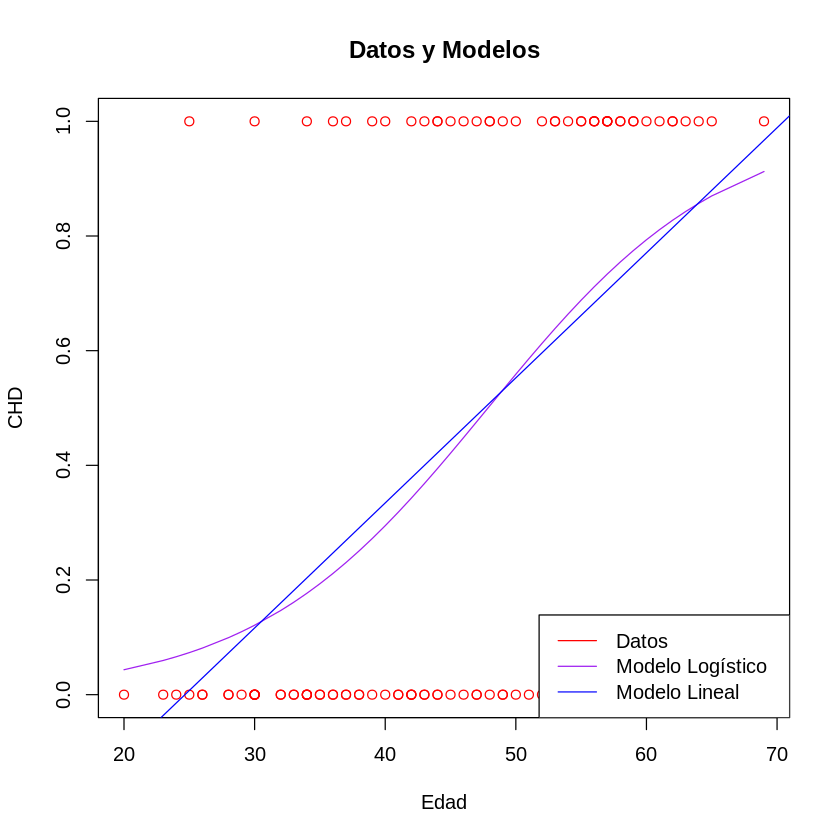

In [ ]:
# Calcular probabilidades estimadas del modelo GLM
prob <- predict(modelo1, type = "response")

# Ajustando un modelo lineal
mod_lineal <- lm(CHD ~ edad, data = coronaria)

# Grafica
plot(coronaria$edad, coronaria$CHD, xlab = "Edad", ylab = "CHD", #Datos
     main = "Datos y Modelos", col = "red")
lines(coronaria$edad, prob, col = "purple") #Curva de probabilidad del modelo logístico
abline(mod_lineal, col = "blue") #Recta del modelo lineal

legend("bottomright", legend = c("Datos", "Modelo Logístico", "Modelo Lineal"),
       col = c("red", "purple", "blue"), lty = 1)

 **d)** Grafica de la curva ROC y calculo del AUC

In [ ]:
install.packages("ROCR")
library(ROCR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Area bajo la curva (AUC): 0.799877600979192"


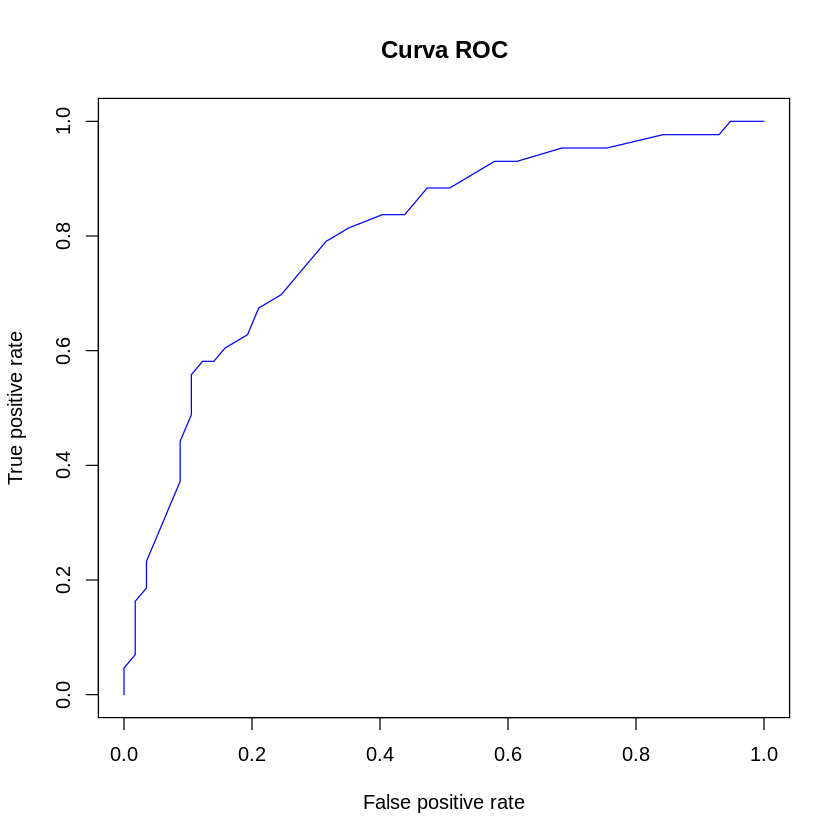

In [ ]:
# Crear un objeto de predicción de ROCR y obtener la curva
pred <- prediction(prob, coronaria$CHD)
ROC <- performance(pred, "tpr", "fpr")

# Graficar la curva ROC
plot(ROC, main = "Curva ROC", col = "blue")

# Calcular el AUC
AUC <- performance(pred, "auc")
print(paste("Area bajo la curva (AUC):", AUC@y.values))

**e)** Podemos inferir implicaciones importantes de los resultados obtenidos.

El coeficiente asociado a la edad es positivo (**0.1109**), esto indica que a medida que la edad aumenta, la probabilidad de padecer CHD tiende a aumentar. La desviacion estondar de la edad es relativamente baja (**0.0241**), lo que sugiere buena precision en la estimacion del efecto de la edad sobre la probabilidad de padecer CHD.

El **AUC** es una medida de la capacidad predictiva del modelo logistico, un valor de AUC cercano a 1 sugiere un buen rendimiento del modelo en terminos de sensibilidad y especificidad. En este caso **AUC = 0.7999**, esto quiere decir que el modelo tiene una capacidad razonable para distinguir entre individuos que padecen CHD y aquellos que no.

La tasa de momios **OR** nos proporciona informacion sobre como cambia la probabilidad de padecer CHD en relacion con el cambio en la edad. En nuestro modelo logistico, el coeficiente asociado a la edad es **0.1109**. Por lo que el **OR** para la edad:

$ OR_{\text{edad}} = e^{0.1109} \approx 1.117 $

Esto significa que por cada aumento en la edad, la probabilidad de padecer CHD incrementa aproximadamente **11.7%**. Podemos decir que las personas mayores tendran una mayor probabilidad de padecer problemas en la coronaria frente a las personas jovenes.
